# Bike Sharing Assignment (Multiple Linear Regression)

## Subhajit Pal

### Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

__From the analysis company wants to know few of these factors :__

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

__Business Goal:__

-  A efficient model needs to be build to find the variables which are significant the demand for shared bikes with the available independent variables.
-  The model will be a good way for management to understand the demand dynamics of a new market. 
-  Management can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Data Sourcing


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [2]:
#Reading the data 
bikesharing=pd.read_csv("data/Bike_sharing_dataset.csv")
sns.set_style("darkgrid")

In [3]:
# checking the columns of data
bikesharing.head()
bikesharing.weathersit.value_counts()


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing.shape

(730, 16)

In [6]:
#Summary statistics of the data
bikesharing.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


## Data Cleaning and Feature Engineering

From the provided Data dictionary following points have been analyzed and considered:

1.  __'instant'__ is a record index used for indexing purpose, so it will not effect in our analysis.
2.  __'dteday'__ is a date value,but as we already have few columns in the dataframe related to month, year, and week days we can remove this column.
3.  __'casual'__ and __'registered'__ variable is describes __'cnt'__ (casual + registered = target), 'cnt' is nothing but our target variable for the analysis. So we will not consider these two variables as well.  

In [7]:
# Dropping redundant columns
drop_cols=["instant","dteday","casual","registered"]
bikesharing.drop(columns=drop_cols,axis=1,inplace=True)

In [8]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Feature Engineering referencing to the data dictionary


In [9]:
#changing the variable month
bikesharing.mnth=bikesharing.mnth.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",
                                           8:"August",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})
# season replacing with spring, summer, fall and winter
bikesharing.season = bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# Replace weathers with the categorical variables
bikesharing.weathersit = bikesharing.weathersit.replace({1:"Clear",2:"Mist",3:"Bad"})
# Replace weekday with categorical features
bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [10]:
bikesharing.head()
bikesharing.weathersit.value_counts()

Clear    463
Mist     246
Bad       21
Name: weathersit, dtype: int64

In [11]:
# Data Exploration on numerical variables
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Columns have all non null values

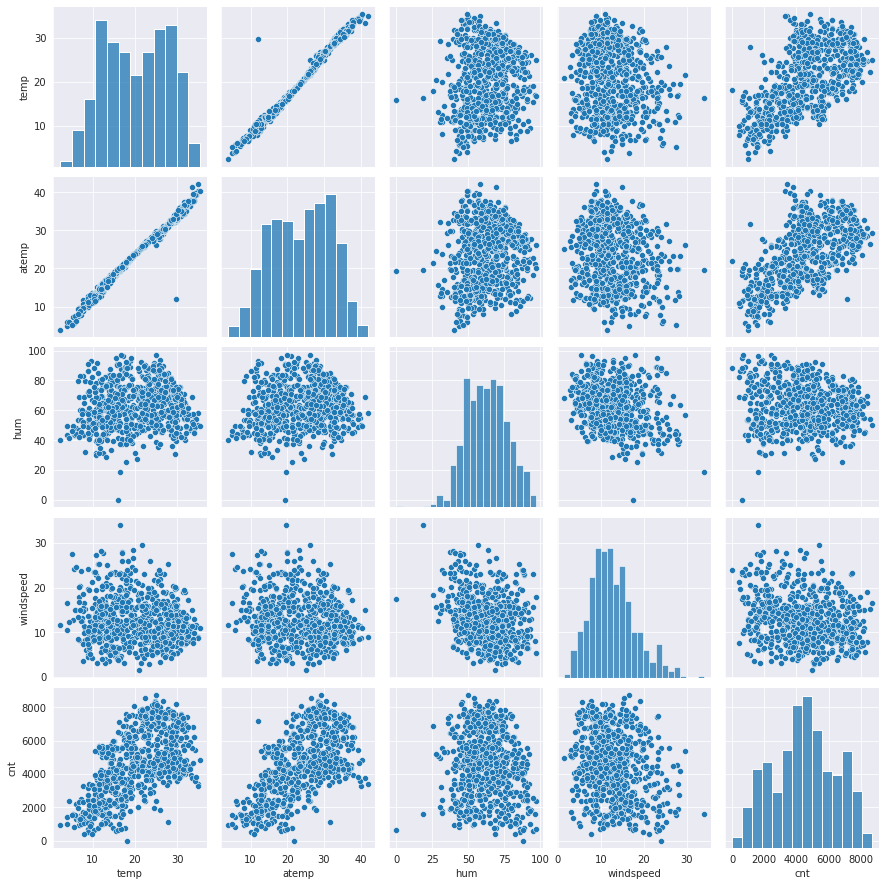

In [12]:
#Data exploration on categorical variables
numerical_cols=["temp","atemp","hum","windspeed","cnt"]
sns.pairplot(bikesharing[numerical_cols])

<AxesSubplot:>

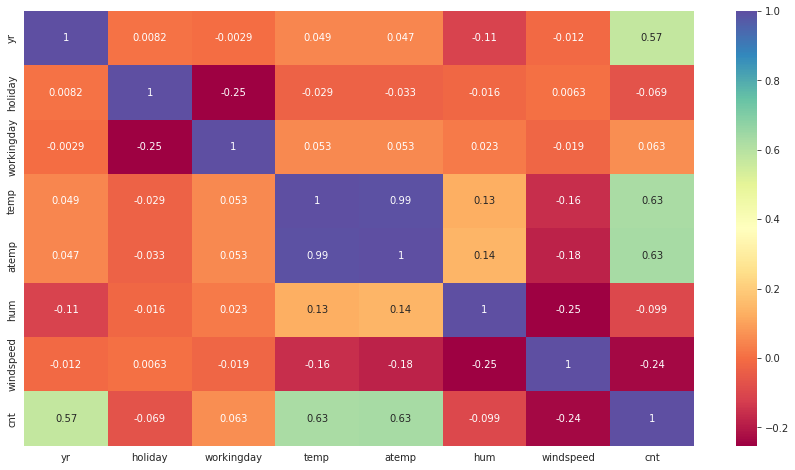

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(bikesharing.corr(),annot = True, cmap="Spectral")

__From the pairplot we observe temp and atemp are strongly correlated so droping temp variable__

In [14]:
# Bivariate data analysis and target column
bikesharing.drop("temp",inplace=True,axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


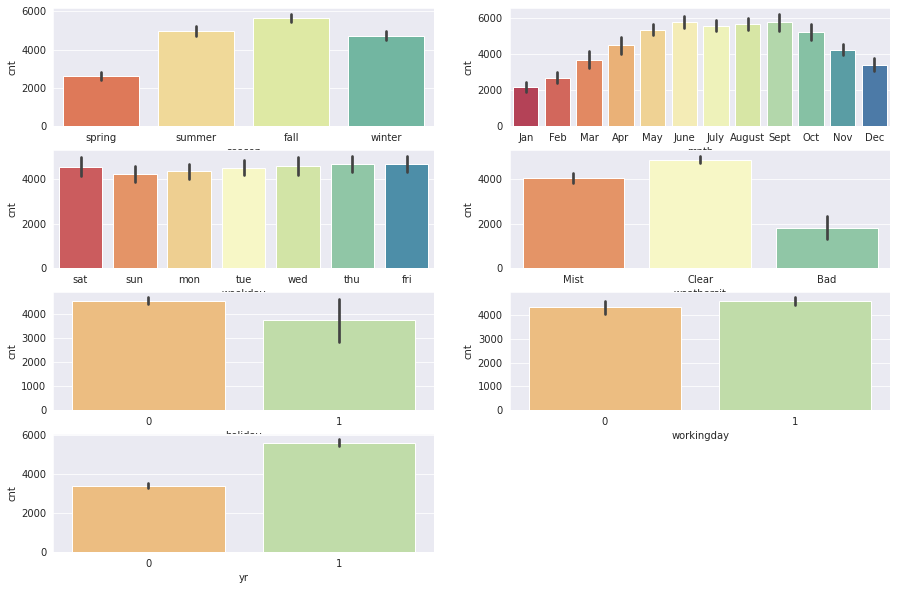

In [15]:
cat_cols=["season","mnth","weekday","weathersit","holiday","workingday","yr"]
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    sns.barplot(data=bikesharing,x=cat_cols[i],y="cnt",palette="Spectral")
    

In [16]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

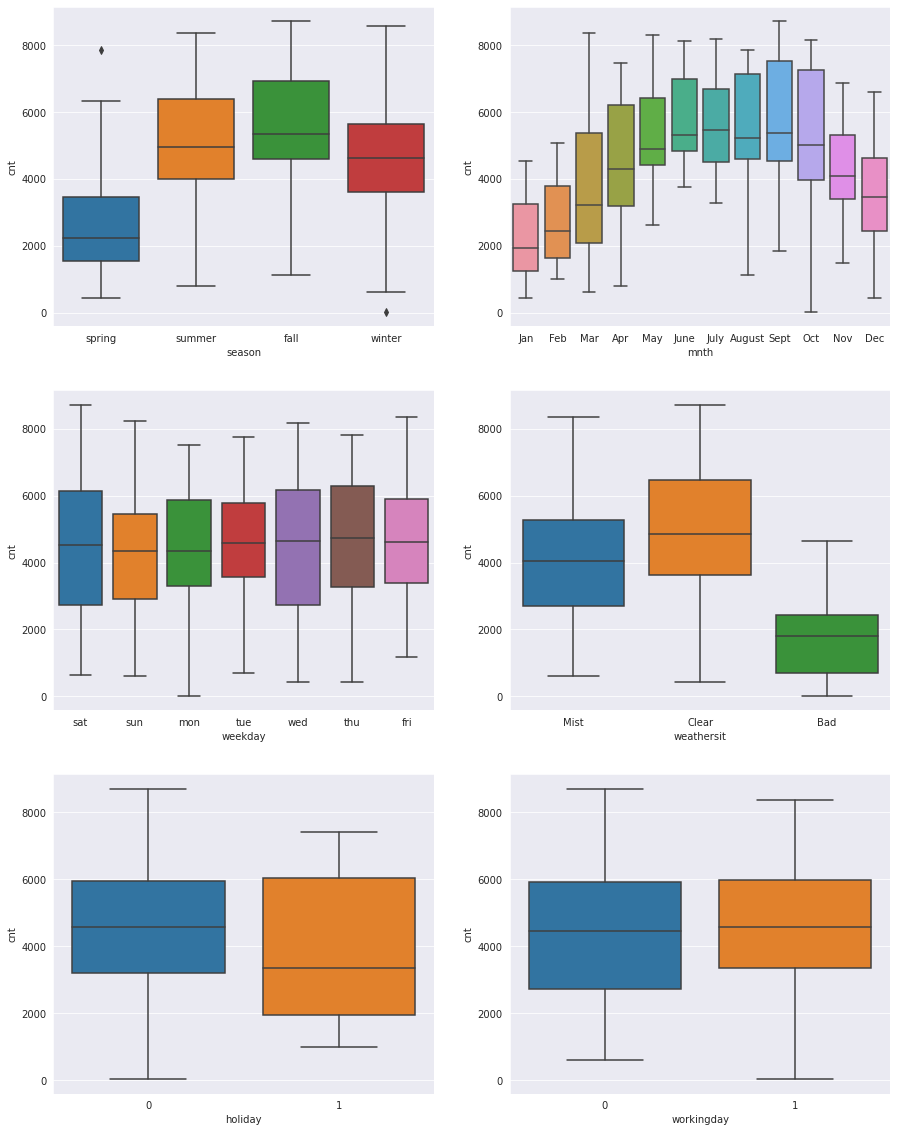

In [17]:
#boxplot against categorc variables
cat_cols=["season","mnth","weekday","weathersit","holiday","workingday"]
plt.figure(figsize=(15,20))
for i in range(len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=bikesharing,x=cat_cols[i],y="cnt")
    

__Following insights and points can be drawn from the above plots :__

1.  Month wise during September bike sharing is more, compare to year ending and starting it is the lowest.
2.  On holidays there is less demand of bike sharing.
3.  Days of the week not clearly distinguish any clear data.
4.  Bike sharing demand increases in clear weather conditions.
5.	Bike demand for the next year is high.
6.  Season wise Fall has the highest bike sharing demand.
7.  Month-wise bike sharing demand is gradually increasing till September and it starts to decrease gradually.

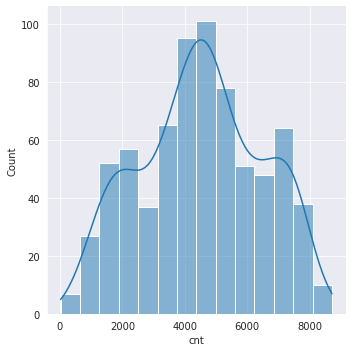

In [18]:
#distribution of the target variable
sns.displot(bikesharing["cnt"],kde=True)

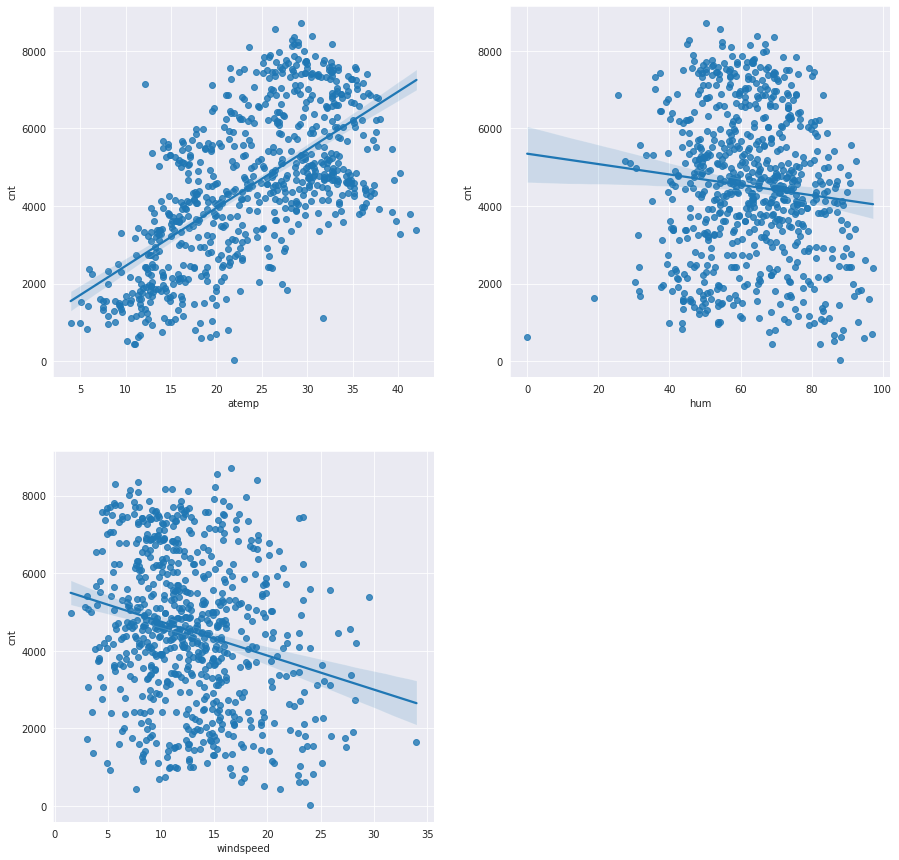

In [19]:
#checking for colinearity of the target variable
numerical_cols=["atemp","hum","windspeed"]
plt.figure(figsize=(15,15))
for i in range(len(numerical_cols)):
    plt.subplot(2,2,i+1)
    sns.regplot(data=bikesharing,x=numerical_cols[i],y="cnt")


__The cnt variable has a strong relation with the atemp variable__ 

In [20]:
#Scaling the numerical variables
numerical_cols=["atemp","hum","windspeed","cnt"]
scaler=MinMaxScaler()

bikesharing[numerical_cols]=scaler.fit_transform(bikesharing[numerical_cols])
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Mist,0.373517,0.828620,0.284606,0.110792
1,spring,0,Jan,0,sun,0,Mist,0.360541,0.715771,0.466215,0.089623
2,spring,0,Jan,0,mon,1,Clear,0.144830,0.449638,0.465740,0.152669
3,spring,0,Jan,0,tue,1,Clear,0.174649,0.607131,0.284297,0.177174
4,spring,0,Jan,0,wed,1,Clear,0.197158,0.449313,0.339143,0.181546


In [21]:
#creating dummy variables out of categorical variables
cat_cols=["season","mnth","weekday","weathersit"]
dummies=pd.get_dummies(bikesharing[cat_cols],drop_first=True)
bikesharing=pd.concat([bikesharing,dummies],axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Mist
0,spring,0,Jan,0,sat,0,Mist,0.373517,0.828620,0.284606,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,sun,0,Mist,0.360541,0.715771,0.466215,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,mon,1,Clear,0.144830,0.449638,0.465740,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,Jan,0,tue,1,Clear,0.174649,0.607131,0.284297,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,Jan,0,wed,1,Clear,0.197158,0.449313,0.339143,...,0,0,0,0,0,0,0,1,1,0


In [22]:
bikesharing.drop(cat_cols,axis=1,inplace=True)

In [23]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear', 'weathersit_Mist'],
      dtype='object')

In [24]:
bikesharing = bikesharing.loc[:,~bikesharing.columns.duplicated()].copy()
bikesharing.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,0.519090,0.645400,0.346568,0.516108,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.634247,0.336986
std,0.500343,0.167266,0.465405,0.213968,0.146402,0.159873,0.222735,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.481971,0.473004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.695494,0.750535,0.434629,0.683847,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [25]:
data_train,data_test=train_test_split(bikesharing,test_size=.3,random_state=100)

In [26]:
print(data_train.shape)
print(data_test.shape)

(511, 29)
(219, 29)


In [27]:
# seperating target and independent columns
y_train=data_train.pop("cnt")
X_train=data_train
y_test=data_test.pop("cnt")
X_test=data_test

In [28]:
lr=LinearRegression()
#fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
rfe = RFE(lr)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', True, 1),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', False, 8),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 14),
 ('weathersit_Clear', True, 1),
 ('weathersit_Mist', True, 1)]

## Columns selected from the Recursive feature elimination

In [30]:
cols=list(X_train.columns[rfe.support_])
cols

['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_August',
 'mnth_Jan',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Clear',
 'weathersit_Mist']

In [31]:
# linear model building using statsmodel
def build_model(cols):
    X_train_feat=sm.add_constant(X_train[cols])
    model=sm.OLS(y_train,X_train_feat).fit()
    print(model.summary())
    return model

In [32]:
# calculate VIF for multicolinearity
def estimate_vif(cols):
    X = X_train[cols]        ## loading the dataset
    vif = pd.DataFrame()     ## creating a vif dataframe
    vif['Features'] = X.columns   
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]    ## calcualting VIF of the features
    print(vif.sort_values(by='VIF',ascending=False))
    return vif["Features"]

## Model 1

In [33]:
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.25e-189
Time:                        23:13:46   Log-Likelihood:                 511.24
No. Observations:                 511   AIC:                            -992.5
Df Residuals:                     496   BIC:                            -928.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0253      0.046  

__Here we can observe that both the p-value and VIF is high  for holiday high eliminating holiday__


## Model 2

In [34]:
cols=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_August',
 'mnth_Jan',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Clear',
 'weathersit_Mist']
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.48e-186
Time:                        23:13:46   Log-Likelihood:                 499.86
No. Observations:                 511   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1720      0.033  

__Removing holiday due to high p value__

## Model 3

In [35]:
cols=['yr',
    'weathersit_Clear',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_August',
 'mnth_Jan',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.48e-186
Time:                        23:13:46   Log-Likelihood:                 499.86
No. Observations:                 511   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1720      0.033  

### As the atemp variable had a strong correlation with the cnt variable removing weathersit_Clear to reduce multicollinearity and incorporating the holiday column 

## Model 4

In [36]:
cols=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_August',
 'mnth_Jan',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.23e-162
Time:                        23:13:46   Log-Likelihood:                 440.40
No. Observations:                 511   AIC:                            -856.8
Df Residuals:                     499   BIC:                            -806.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1107      0.025     

### As the month of jan had significantly low cnt of bike rentals so removing it

### Model 5

In [37]:
cols=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_August',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.98e-163
Time:                        23:13:46   Log-Likelihood:                 438.26
No. Observations:                 511   AIC:                            -854.5
Df Residuals:                     500   BIC:                            -807.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0865      0.022     

### The r2 and adj r2 for the model is .79 and .78 but still the VIF for the atemp is above thresold thus removing mnth_aug for checking the model performance

## Model 7

In [38]:
cols=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']
model=build_model(cols)
features=estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.86e-161
Time:                        23:13:46   Log-Likelihood:                 431.69
No. Observations:                 511   AIC:                            -843.4
Df Residuals:                     501   BIC:                            -801.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0797      0.022     

### Although the r2 score dropped after dropping the mnth_aug value but all the metrics matches and complies with the thresold value.

### Selecting Model 7 as the final model


In [39]:
lr=LinearRegression()
cols=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']

In [40]:
lr.fit(X_train[cols],y_train)

LinearRegression()

In [41]:
# printing the constant and coefficient values
print(lr.intercept_,lr.coef_)

0.07971155321913581 [ 0.24027227  0.04880068  0.58184709 -0.17164779  0.08244935  0.10920304
  0.08823172  0.05941352 -0.06754228]


### Residual Analysis

In [42]:
# predicting the target variable based on the Latest Liner Regression model we have build
y_train_pred = lr.predict(X_train[cols])

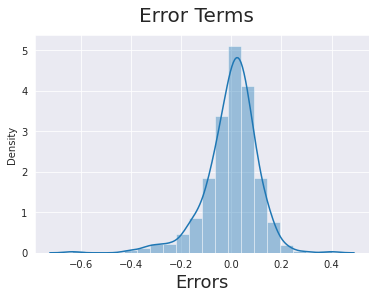

In [43]:
# Ploting the histogram/ distribution of error terms as part of residual analysis
fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 20)  ### error term = actual target value - predicted target value
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

plt.show()

### Linearity check

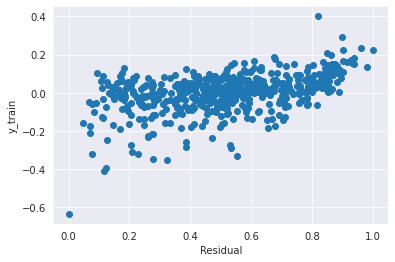

In [44]:
# scatter plot to check linearity of the residuals

residual = (y_train - y_train_pred)   ## calculating error term or residual
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")

plt.show()

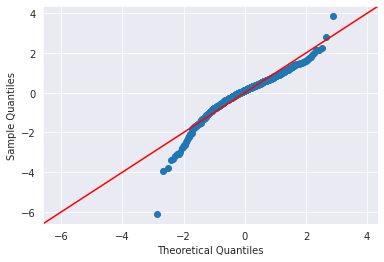

In [45]:
# plotting Q-Q plot to check the distribution of the error terms on train results
sm.qqplot(residual, fit = True, line = '45')
plt.show()

In [46]:
#r2 test on train data set
r2_score(y_train,y_train_pred)

0.7855895209213655

### prediction on the test data set

In [47]:
y_test_pred=lr.predict(X_test[cols])

In [48]:
r2_score(y_test,y_test_pred)

0.7693990411404562

R2 score value for predictions on test data (0.785) and R2 score value of train data(0.769). Those two R-Squared values not much differ from each other then is difference of 2-3%, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

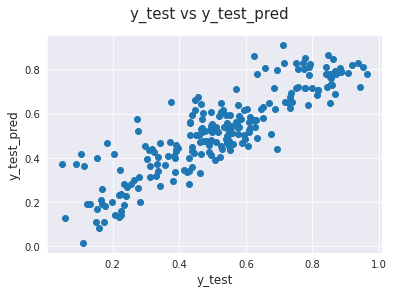

In [49]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_test_pred', fontsize = 12)

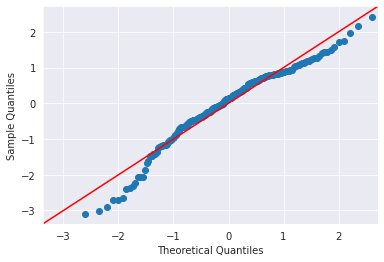

In [50]:
residual=y_test-y_test_pred
sm.qqplot(residual, fit = True, line = '45')
plt.show()

### Model interpretation


In [51]:
final_feat=['yr',
 'workingday',
 'atemp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sept',
 'weekday_sat',
 'weathersit_Mist']
model=build_model(final_feat)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.86e-161
Time:                        23:13:46   Log-Likelihood:                 431.69
No. Observations:                 511   AIC:                            -843.4
Df Residuals:                     501   BIC:                            -801.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0797      0.022     

# Conclusion:
## Significant variables:
1. __Temperature__
2. __Workingday__
3. __Wind Speed__
5. __Seasons (Summer, Winter etc.)__
6. __Year__(2019)
7. __Day of week(Sat)__
8. __Weathersit(Clear,Misty etc.)__
9. __Months (Sep,Aug )__

## Best fit line:
## __cnt = 0.079 + 0.24 x yr + 0.04 x workingday + 0.58 x atemp - 0.17 x windspeed + 0.08 x summer + 0.1092 x winter + 0.08 x mnth_Sept + 0.05 x weekday_sat - 0.06 x mist__